In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#ブレンドモード計算式

#A:重ね先(0.0～1.0)
#B:重ねレイヤー(0.0～1.0)

#加算:A+B(覆い焼きリニア)
def add(A,B):
  C=A+B
  return np.where(C>1.,1.,C)

#乗算:A*B
def mult(A,B):
  return A*B

#スクリーン:1-((1-A)*(1-B))
def screen(A,B):
  return 1-((1-A)*(1-B))
  #1-(1-(A+B)+A*B)
  #A+B-A*B

#焼き込みリニア:1-((1-A)+(1-B))
def linerburn(A,B):
  C=1-((1-A)+(1-B))
  #A+B-1
  C=np.where(C>1.,1.,C)
  C=np.where(C<0.,0.,C)
  return C

#焼き込みカラー:1-(1-A)/B
def colorburn(A,B):
  C=1-(1-A)/B
  C=np.where(C>1.,1.,C)
  C=np.where(C<0.,0.,C)
  return C

#覆い焼きカラー:A/(1-B)
def colordodge(A,B):
  C=A/(1-B)
  C=np.where(C>1.,1.,C)
  C=np.where(C<0.,0.,C)
  return C

#オーバーレイ；if A>0.5:スクリーン else:乗算
def overlay(A,B):
  C=np.where(A > 0.5,1-2*(1-A)*(1-B),2*A*B)
  C=np.where(C>1.,1.,C)
  C=np.where(C<0.,0.,C)
  return C

#ソフトライト
def softlight(A,B):
  return np.where(B>0.5,2*A*(1-B)+np.sqrt(A)*(2*B-1),2*A*B+A*A*(1-2*B))

#ハードライト
def hardlight(A,B):
  return np.where(B>0.5,1-2*(1-A)*(1-B),2*A*B)

<ipython-input-2-f4306772e680>:35: RuntimeWarning: divide by zero encountered in divide
  C=1-(1-A)/B


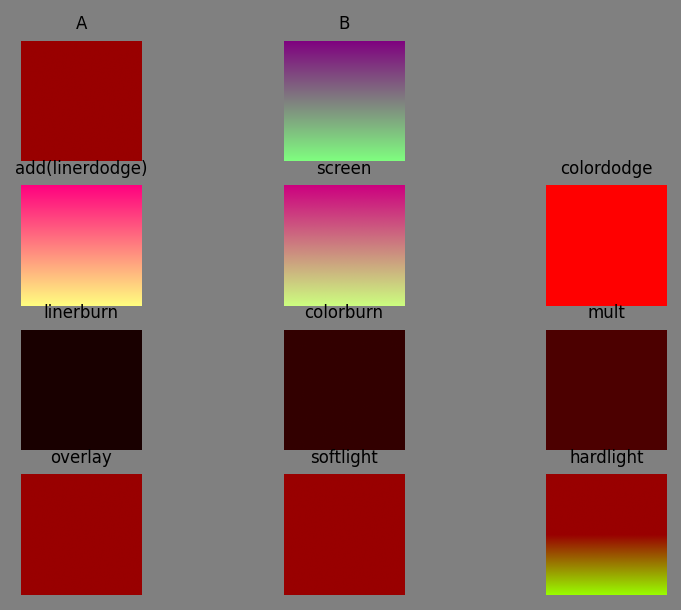

In [ ]:
A=np.array([[[0.6,0.0,0.0] for i in range(255)] for j in range(255)])
#A=np.array([[[(i/255),0.0,0.0] for i in range(255)] for j in range(255)])
#A=np.array([[[(i/255),(j/255),0.5] for i in range(255)] for j in range(255)])
#B=np.array([[[((i/255)+(j/255))/2 for k in range(3)] for i in range(255)] for j in range(255)])
#B=np.array([[[((j/255)) for k in range(3)] for i in range(255)] for j in range(255)])
#B=np.array([[[(i/255),(j/255),0.5] for i in range(255)] for j in range(255)])
B=np.array([[[0.5,(j/255),0.5] for i in range(255)] for j in range(255)])
Cs=[add(A,B),screen(A,B),colordodge(A,B),linerburn(A,B),colorburn(A,B),mult(A,B),overlay(A,B),softlight(A,B),hardlight(A,B)]
titles=["add(linerdodge)","screen","colordodge","linerburn","colorburn","mult","overlay","softlight","hardlight"]

x=3
y=(len(Cs)+x-1)//x+1

plt.figure(dpi=150,facecolor="gray")
plt.subplot(y,x,1)
plt.title("A",fontsize=8)
plt.axis("off")
plt.imshow(A)

plt.subplot(y,x,2)
plt.title("B",fontsize=8)
plt.axis("off")
plt.imshow(B)

for i,C in enumerate(Cs):
  plt.subplot(y,x,i+1+x)
  plt.title(titles[i],fontsize=8)
  plt.axis("off")
  plt.imshow(C)

plt.show()